Loading the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


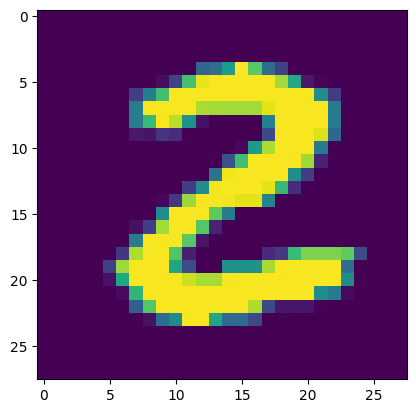

2


In [7]:
plt.imshow(X_train[25])
plt.show()

print(Y_train[25])

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
X_train = X_train/255

In [11]:
X_test = X_test/255

In [12]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [14]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [15]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 1ms/step - loss: 0.2945 - accuracy: 0.9144
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1390 - accuracy: 0.9577
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1041 - accuracy: 0.9677
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0846 - accuracy: 0.9737
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0701 - accuracy: 0.9780
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0600 - accuracy: 0.9816
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9830
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0464 - accuracy: 0.9850
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0415 - accuracy: 0.9868
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

Accuracy on Test data

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.9767


In [17]:
print(X_test.shape)

(10000, 28, 28)


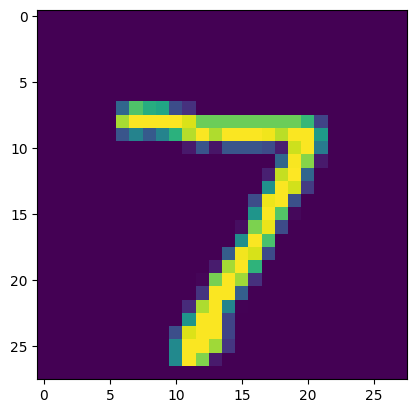

In [18]:
plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


In [20]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
print(Y_pred.shape)

(10000, 10)


In [22]:
print(Y_pred[0])

[1.28595204e-07 9.74477317e-08 9.49898899e-01 8.65279019e-01
 2.22453274e-08 1.31214265e-05 5.70013925e-10 9.99999762e-01
 7.07174605e-03 4.39681411e-02]


Converting the prediction probabilities to class labels

In [23]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [24]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion Matrix

In [25]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [26]:
print(conf_mat)

tf.Tensor(
[[ 970    0    1    0    0    1    4    1    3    0]
 [   0 1119    5    2    1    1    2    1    3    1]
 [   3    0 1009    4    2    0    4    6    3    1]
 [   1    0    7  978    0   12    0    5    3    4]
 [   0    0    3    0  958    1    7    1    2   10]
 [   2    0    0    9    1  865    6    0    7    2]
 [   2    2    2    1    2    5  942    0    2    0]
 [   1    2    9    2    3    0    0 1001    2    8]
 [   0    0    4    5    4    2    0    2  951    6]
 [   1    3    0    3   14    7    1    4    7  969]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

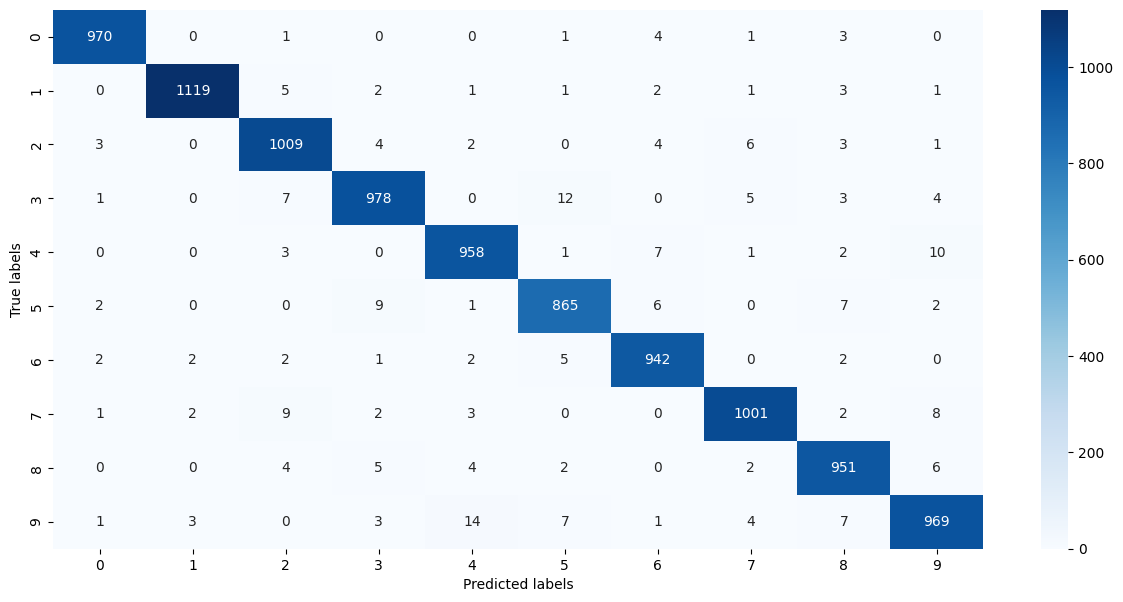

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

Building a Predictive System

In [28]:
input_image_path = "../test_image.png"

input_image = cv2.imread(input_image_path)

In [29]:
type(input_image)

numpy.ndarray

In [30]:
print(input_image)

[[[243 243 243]
  [243 243 243]
  [243 243 243]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[ 44  31  41]
  [ 46  31  42]
  [ 46  31  42]
  ...
  [ 48  33  44]
  [ 48  33  44]
  [ 48  33  44]]

 [[ 71   1  57]
  [ 84   1  68]
  [ 84   1  68]
  ...
  [ 84   1  68]
  [ 84   1  68]
  [ 84   1  68]]

 ...

 [[ 71   1  57]
  [ 84   1  68]
  [ 84   1  68]
  ...
  [ 84   1  68]
  [ 84   1  68]
  [ 84   1  68]]

 [[ 71   1  57]
  [ 84   1  68]
  [ 84   1  68]
  ...
  [ 84   1  68]
  [ 84   1  68]
  [ 84   1  68]]

 [[ 71   1  57]
  [ 84   1  68]
  [ 84   1  68]
  ...
  [ 84   1  68]
  [ 84   1  68]
  [ 84   1  68]]]


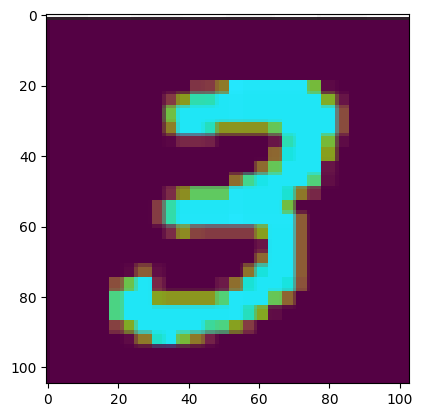

In [31]:
plt.imshow(input_image)
plt.show()

In [32]:
input_image.shape

(105, 103, 3)

In [33]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(105, 103)

In [35]:
input_img_resized = cv2.resize(grayscale, (28, 28))

In [36]:
print(input_img_resized.shape)

(28, 28)


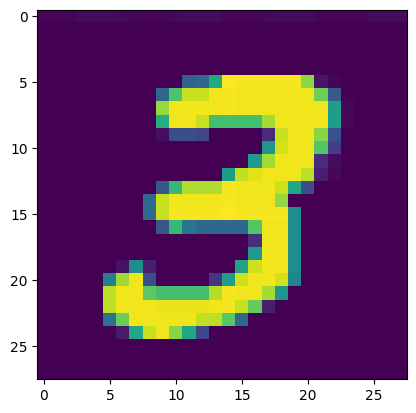

In [37]:
plt.imshow(input_img_resized)
plt.show()

In [38]:
input_img_resized = input_img_resized/255

In [39]:
image_reshaped = np.reshape(input_img_resized, [1, 28, 28])

In [40]:
input_pred = model.predict(image_reshaped)
print(input_pred)

1/1 [==============================] - 0s 20ms/step
[[2.1883017e-17 2.9325159e-08 6.1753984e-05 1.0000000e+00 4.3781029e-12
  5.3661460e-01 6.8900344e-16 4.3508849e-06 6.1620682e-07 6.6606361e-07]]


In [41]:
input_pred_label = np.argmax(input_pred)

In [42]:
print(input_pred_label)

3


In [43]:
import pickle

with open("../model.pkl", "wb") as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)